# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.212729e+01     7.622001e+00
 * time: 0.0014600753784179688
     1     2.973087e+01     5.582684e+00
 * time: 0.0062808990478515625
     2     2.730087e+01     1.145644e+01
 * time: 0.012691020965576172
     3     1.362146e+01     2.680460e+00
 * time: 0.021123886108398438
     4     1.095048e+01     1.542889e+00
 * time: 0.028313875198364258
     5     1.064438e+01     2.515357e+00
 * time: 0.03449702262878418
     6     9.917572e+00     1.404981e+00
 * time: 0.040910959243774414
     7     9.492005e+00     1.184410e+00
 * time: 0.04769110679626465
     8     8.974613e+00     9.793407e-01
 * time: 0.05521702766418457
     9     8.632412e+00     8.618437e-01
 * time: 0.06194496154785156
    10     8.397857e+00     7.346765e-01
 * time: 0.06890606880187988
    11     8.241904e+00     8.944202e-01
 * time: 0.0748748779296875
    12     8.131290e+00     6.710437e-01
 * time: 0.08134007453918457
    13     8.075008e+00     8.525136e-01
 

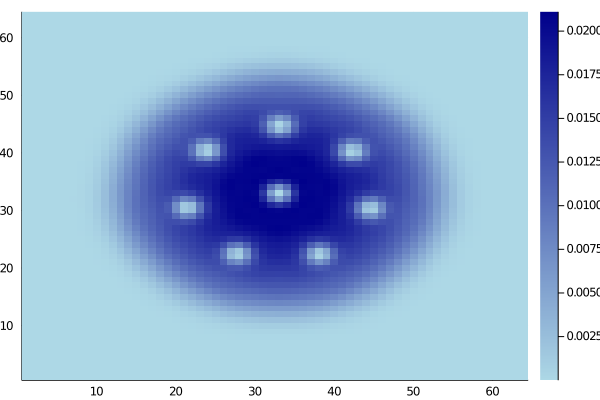

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)